# Project: Explore US Birth rates on different time scales

<br>

## Questions to address:
- Analyse statistics related to the number of births in the US per day.
- The first step is to clean up the data and merge data files (data is separated into 1994 to 2003 and 2000 to 2014)
- Then different statistics are computed: births per day, per month, in different days of the week, etc.

<br>

## Tools:
- read text from file and convert to list of strings
- manipulation of lists of strings
- frequency counts using dictionaries
- line and bar plots

<br>

## Dataset: US birth rate per day (two files)

read the two files (US births on eachday from 1994 until 2014) and save the mean for the days where there is overlap

In [1]:
from IPython.display import display

def read_csv(file_name):    
    f=open(file_name,'r')
    data=f.read()
    string_list=data.split('\n')
    header = string_list[0]
    string_list=string_list[1:]
    
    final_list=[]
    for each_str in string_list:
        int_fields=[]
        string_fields=each_str.split(',')
        
        for each_field in string_fields:
            int_fields.append(int(each_field))
            
        final_list.append(int_fields)
        
    return (header, final_list)

header_1, cdc_list=read_csv('./data/US_births_1994-2003_CDC_NCHS.csv')
header_2,ssa_list=read_csv('./data/US_births_2000-2014_SSA.csv')

US_births = cdc_list

for each_day in ssa_list:
    if each_day[0]>2003:
        US_births.append(each_day)
    else:
        ii=0
        for each_day_new in US_births:
            if ((each_day_new[0]==each_day[0]) & 
                (each_day_new[1]==each_day[1]) &
                (each_day_new[2]==each_day[2]) &
                (each_day_new[3]==each_day[3])):
                US_births[ii]=[each_day[0], each_day[1], 
                              each_day[2], each_day[3], 
                              (each_day[4]+each_day_new[4])/2]
            ii+=1
          
print(header_1)
display(US_births[:12])

year,month,date_of_month,day_of_week,births


[[1994, 1, 1, 6, 8096],
 [1994, 1, 2, 7, 7772],
 [1994, 1, 3, 1, 10142],
 [1994, 1, 4, 2, 11248],
 [1994, 1, 5, 3, 11053],
 [1994, 1, 6, 4, 11406],
 [1994, 1, 7, 5, 11251],
 [1994, 1, 8, 6, 8653],
 [1994, 1, 9, 7, 7910],
 [1994, 1, 10, 1, 10498],
 [1994, 1, 11, 2, 11706],
 [1994, 1, 12, 3, 11567]]

<br>

## Analysis: 

plotting defaults:

In [83]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

colors = [(0/255,107/255,164/255), (255/255, 128/255, 14/255), 'red', 'green']

Create a function to count the number of births on any column of the data: year, month, date_of_month or day_of_week

In [84]:
def calc_birth_counts(input_list, column):
    
    births_per_col={}
    
    for each_element in input_list:
        #each_element[4] is the number of births
        birth_rate = each_element[4]       
        if each_element[column] in births_per_col:
            births_per_col[each_element[column]]+=int(birth_rate)
        else:
            births_per_col[each_element[column]]=int(birth_rate)
            
    return (births_per_col)

births_per_year = calc_birth_counts(US_births, 0)
births_per_month = calc_birth_counts(US_births, 1)
births_per_dom = calc_birth_counts(US_births, 2)
births_per_dow = calc_birth_counts(US_births, 3)

print(births_per_month)

{1: 6965310, 2: 6499459, 3: 7134617, 4: 6838762, 5: 7162927, 6: 7110295, 7: 7514008, 8: 7610244, 9: 7425952, 10: 7278923, 11: 6869491, 12: 7139141}


<br>

### Evolution of US birth rate over the years:

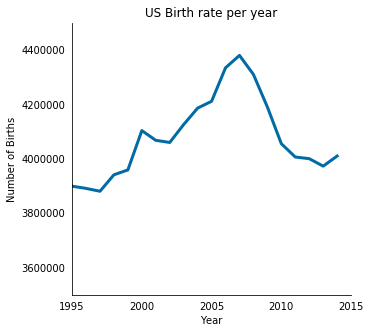

In [85]:
fig = plt.figure(figsize=(5,5))
ax = plt.subplot()
  
#axis mods
for key, spine in ax.spines.items():
    if(key=='top' or key=='right'):
        spine.set_visible(False)
ax.tick_params(left=False, right=False, top=False, bottom=False)
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.set_xlim(1995, 2015); ax.set_ylim(3500000,4500000)
ax.set_xlabel('Year'); ax.set_ylabel('Number of Births')
ax.set_title('US Birth rate per year')
            
ax.plot(births_per_year.keys(), births_per_year.values(), c=colors[0], linewidth=3)

Birth rates in the US peaked ~2007, this is likely related to the financial crisis.

<br>

### US birth rate in different months:

<BarContainer object of 12 artists>

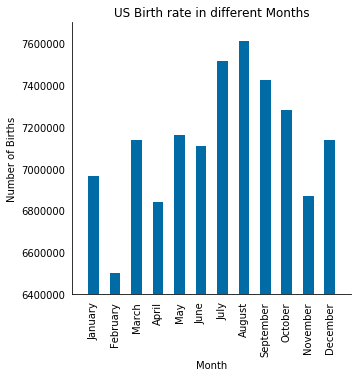

In [88]:
fig = plt.figure(figsize=(5,5))
ax = plt.subplot()
  
#axis mods
for key, spine in ax.spines.items():
    if(key=='top' or key=='right'):
        spine.set_visible(False)
ax.tick_params(left=False, right=False, top=False, bottom=False)
ax.set_xlim(0, 13); ax.set_ylim(6400000,7700000)
ax.set_xlabel('Month'); ax.set_ylabel('Number of Births')
ax.set_title('US Birth rate in different Months')
            
Months = ['January', 'February', 'March', 'April', 'May', 'June', 
          'July', 'August', 'September', 'October', 'November', 'December']    
tick_positions = range(1,13)
ax.set_xticks(tick_positions)
ax.set_xticklabels(Months, rotation=90)
ax.bar(births_per_month.keys(), births_per_month.values(),width=0.5, color=colors[0])

In the years for which we have data available most babies are born in the summer. The low numbers in February are caused by the number of days in that month.

<br>

### Explore the evolution of the number of births in a given month over the years:

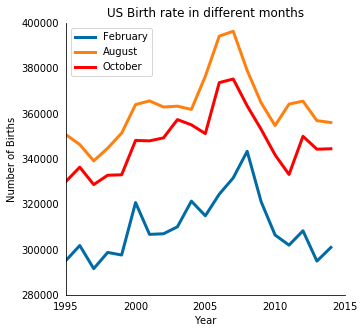

In [89]:
def accross_years(input_list, column, element):
    births_accross_years={}
    for each_element in input_list:
        birth_rate = each_element[4]
        if each_element[column]==element:            
            if each_element[0] in births_accross_years:
                births_accross_years[each_element[0]]+=birth_rate
            else:
                births_accross_years[each_element[0]]=birth_rate
    return(births_accross_years)

births_in_a_month = []
for ii in range(1,12+1):
    births_in_a_month.append(accross_years(US_births,1,ii))

fig = plt.figure(figsize=(5,5))
ax = plt.subplot()
  
#axis mods
for key, spine in ax.spines.items():
    if(key=='top' or key=='right'):
        spine.set_visible(False)
ax.tick_params(left=False, right=False, top=False, bottom=False)
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.set_xlim(1995, 2015); ax.set_ylim(280000,400000)
ax.set_xlabel('Year'); ax.set_ylabel('Number of Births')
ax.set_title('US Birth rate in different months')
            
ax.plot(births_in_a_month[1].keys(), births_in_a_month[1].values(), c=colors[0], linewidth=3, label=Months[1])
ax.plot(births_in_a_month[7].keys(), births_in_a_month[7].values(), c=colors[1], linewidth=3, label=Months[7])
ax.plot(births_in_a_month[9].keys(), births_in_a_month[9].values(), c=colors[2], linewidth=3, label=Months[9])
plt.legend(loc='upper left')

<br>

### Explore the evolution of the number of births in different seasons over the years:

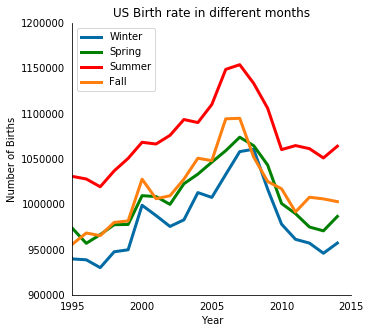

In [90]:
def accross_years(input_list, column, element):
    births_accross_years={}
    for each_element in input_list:
        birth_rate = each_element[4]
        if each_element[column] in [3*element+1, 3*element+2, 3*element+3]:            
            if each_element[0] in births_accross_years:
                births_accross_years[each_element[0]]+=birth_rate
            else:
                births_accross_years[each_element[0]]=birth_rate
    return(births_accross_years)

births_in_a_season = []
for ii in range(0,4):
    births_in_a_season.append(accross_years(US_births,1,ii))

fig = plt.figure(figsize=(5,5))
ax = plt.subplot()
  
#axis mods
for key, spine in ax.spines.items():
    if(key=='top' or key=='right'):
        spine.set_visible(False)
ax.tick_params(left=False, right=False, top=False, bottom=False)
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.set_xlim(1995, 2015); ax.set_ylim(900000,1200000)
ax.set_xlabel('Year'); ax.set_ylabel('Number of Births')
ax.set_title('US Birth rate in different months')
            
ax.plot(births_in_a_season[0].keys(), births_in_a_season[0].values(), c=colors[0], linewidth=3, label='Winter')
ax.plot(births_in_a_season[1].keys(), births_in_a_season[1].values(), c=colors[3], linewidth=3, label='Spring')
ax.plot(births_in_a_season[2].keys(), births_in_a_season[2].values(), c=colors[2], linewidth=3, label='Summer')
ax.plot(births_in_a_season[3].keys(), births_in_a_season[3].values(), c=colors[1], linewidth=3, label='Fall')
plt.legend(loc='upper left')

There is a hint of an increase of Births in the fall in recent years. This could be related to people wanting their kids to be 6 years and 9-12 months rather than 6 years and 1-3 months when entering school.